In [83]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import PorterStemmer
import seaborn as sns

In [84]:
!pip install nltk
nltk.download('punkt')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [85]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5465,ham,Shall I bring us a bottle of wine to keep us a...,NaN,NaN,NaN
3608,ham,Joy's father is John. Then John is the ____ of...,NaN,NaN,NaN
1693,ham,Was gr8 to see that message. So when r u leavi...,NaN,NaN,NaN
3098,ham,Ok... I din get ur msg...,NaN,NaN,NaN
173,ham,"Bloody hell, cant believe you forgot my surnam...",NaN,NaN,NaN
12,spam,URGENT! You have won a 1 week FREE membership ...,NaN,NaN,NaN
4392,spam,RECPT 1/3. You have ordered a Ringtone. Your o...,NaN,NaN,NaN
3930,ham,Nooooooo I'm gonna be bored to death all day. ...,NaN,NaN,NaN
4145,ham,I canåÕt wait for cornwall. Hope tonight isnåÕ...,NaN,NaN,NaN
1275,ham,Wot u up 2 u weirdo?,NaN,NaN,NaN


In [86]:
df.shape

(5572, 5)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [88]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# Data Cleaning

In [89]:
# drop last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

# renaming the columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)

df.sample(5)

,target,text
432,spam,Congrats! Nokia 3650 video camera phone is you...
2584,ham,Hi happy birthday. Hi hi hi hi hi hi hi
555,ham,O. Well uv causes mutations. Sunscreen is like...
5505,ham,What i told before i tell. Stupid hear after i...
3695,ham,I am in tirupur. call you da.


In [90]:
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

In [91]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [92]:
# check for duplicate values
df.duplicated().sum()

403

In [93]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [94]:
df.duplicated().sum()

0

In [95]:
df.shape

(5169, 2)

# EDA(Exploratory Data Analysis)

In [96]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [97]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

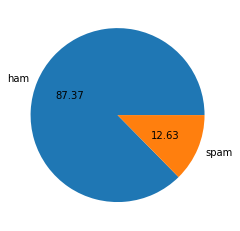

In [98]:
#showing how much msg is spam or not
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

plt.show()

In [99]:
df['num_characters'] = df['text'].apply(len)

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [100]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [101]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [102]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

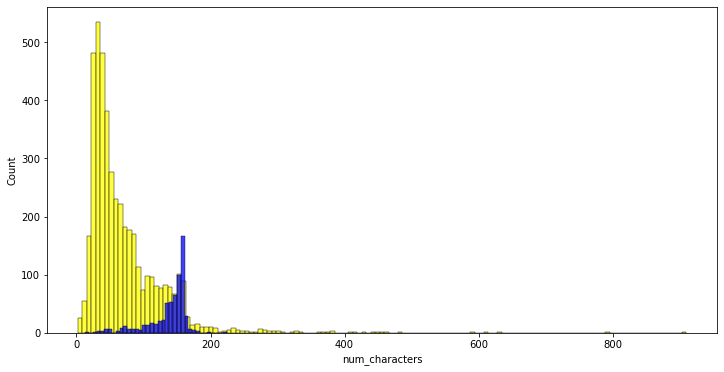

In [103]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'], color='yellow')
sns.histplot(df[df['target'] == 1]['num_characters'],color='blue')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

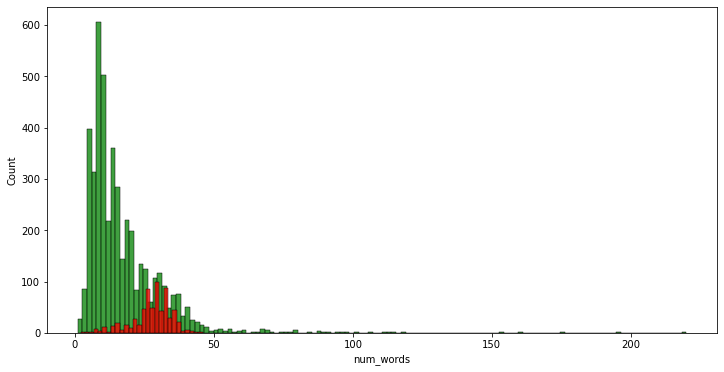

In [104]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'],color='green')
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

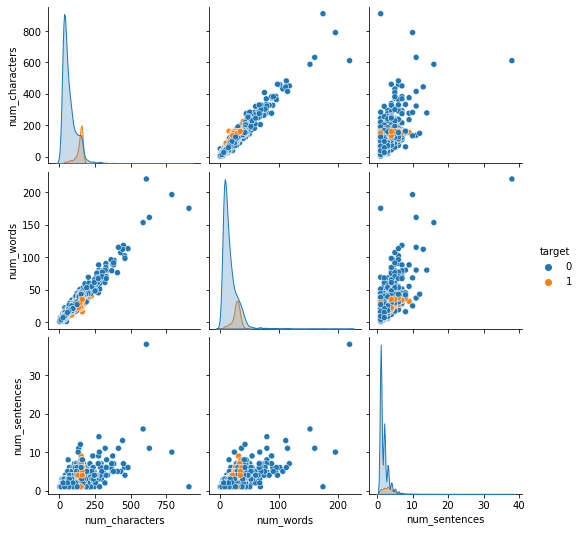

In [105]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

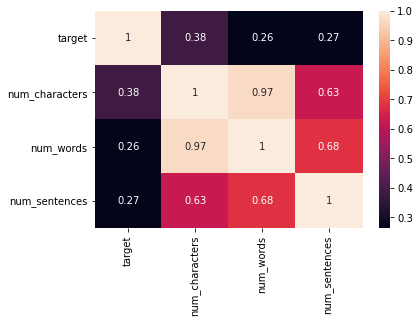

In [106]:
sns.heatmap(df.corr(),annot=True)

# Data preprocessing

In [107]:
#Lower casing
#Word Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming

In [108]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [109]:
ps = PorterStemmer()
ps.stem('eating')

'eat'

In [110]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
df['transformed_text'] = df['text'].apply(transform_text)

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [113]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [112]:
from wordcloud import WordCloud

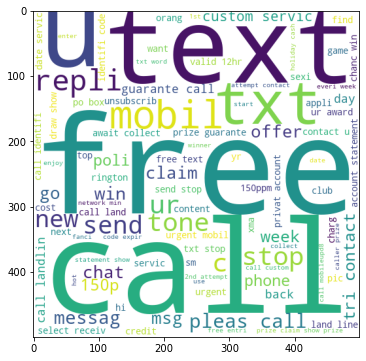

In [114]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

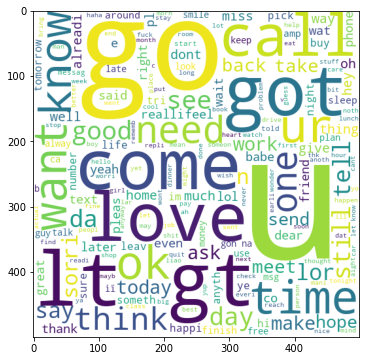

In [150]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [116]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [117]:
len(spam_corpus)

9939

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


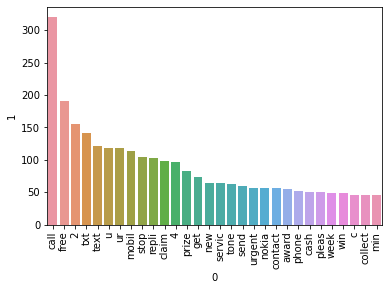

In [118]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [119]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [120]:
len(ham_corpus)

35402

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


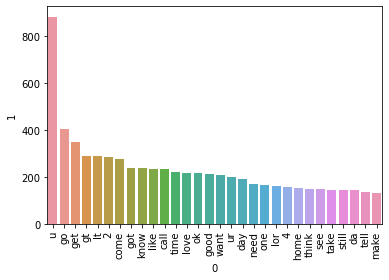

In [121]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [122]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [123]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [124]:
X.shape

(5169, 3000)

In [125]:
y = df['target'].values

In [126]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [127]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

#gnb = GaussianNB()
mnb = MultinomialNB()
#bnb = BernoulliNB()

In [128]:
#gnb.fit(X_train,y_train)
#y_pred1 = gnb.predict(X_test)
#print('Accuracy: ' , accuracy_score(y_test,y_pred1))
#print('Confusion Matrix: ')
#print(confusion_matrix(y_test,y_pred1))
#print('Precision: ', precision_score(y_test,y_pred1))

In [129]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred2))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred2))
print('Precision: ', precision_score(y_test,y_pred2))

Accuracy:  0.9709864603481625
Confusion Matrix: 
[[896   0]
 [ 30 108]]
Precision:  1.0


In [130]:
#bnb.fit(X_train,y_train)
#y_pred3 = bnb.predict(X_test)
#print('Accuracy: ', accuracy_score(y_test,y_pred3))
#print('Confusion Matrix: ')
#print(confusion_matrix(y_test,y_pred3))
#print('Precision: ', precision_score(y_test,y_pred3))

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [133]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [134]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'GBDT':gbdt,
}

In [135]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [136]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [137]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192


In [138]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [140]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
7,GBDT,0.946809,0.919192
3,DT,0.930368,0.817308


In [141]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.958414
5,AdaBoost,Accuracy,0.960348
6,GBDT,Accuracy,0.946809
7,DT,Accuracy,0.930368
8,KN,Precision,1.000000
9,NB,Precision,1.000000


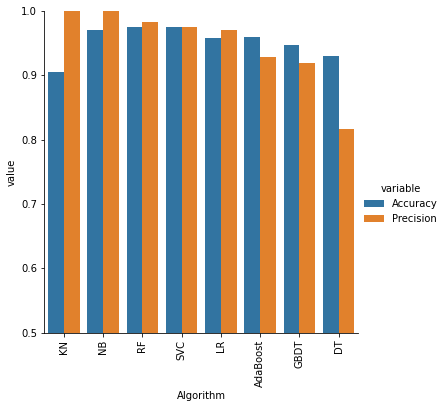

In [142]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [144]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [145]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

new_df = performance_df.merge(temp_df,on='Algorithm')

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [146]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
7,DT,0.930368,0.817308,0.930368,0.817308,0.930368,0.817308,0.930368,0.817308


In [147]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('dt', dtc), ('rf',rfc), ('ab', abc),('lr', lrc),('gbdt', gbdt),('mnb',mnb)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('dt', DecisionTreeClassifier(max_depth=5)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('ab', AdaBoostClassifier(random_state=2)),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('gbdt',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2)),
                             ('mnb', MultinomialNB())],
                 voting='soft')

In [148]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9738878143133463
Precision 0.9911504424778761


In [149]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))